# Supervised Learning Project (07-26-19) - (Week 8 Project)

## The importation of the required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import statsmodels.api as sm
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn import metrics
from sklearn import linear_model

## The importation of the data sheet (https://www.kaggle.com/ionaskel/laptop-prices)

In [2]:
data = pd.read_csv('laptops.csv', encoding = "ISO-8859-1")
data.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Cleaning of the datasheet

In [3]:
data = data[data['Company'].isin(["Lenovo", "Dell", "HP", "Asus", "Acer"])]
# Only calculate data based on the top 5 sellers

data = data.drop(columns=['Unnamed: 0', 'Product', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'Weight'])
#Removed all of the columns that either have to high of a heatmap value, or not needed.

data['Ram'] = data['Ram'].astype(str).str[:-2].astype(np.int64)
#Cleaned the ram col from the 'GB' end 

## Display of the correlation matrix after cleaning

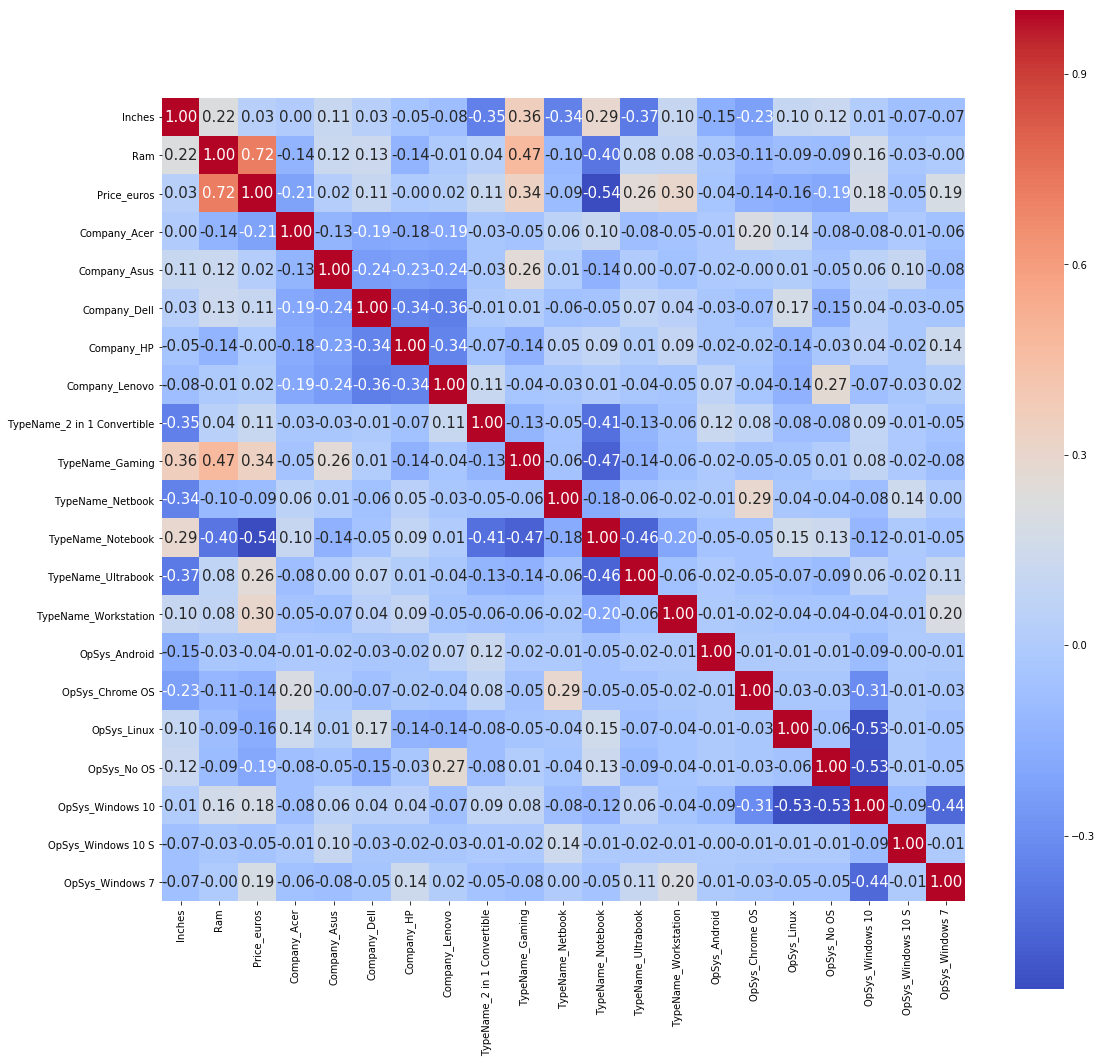

In [4]:
matrix = pd.get_dummies(data)# Create a dummy matrix
figure(figsize=(18, 18)) #Change size
sns.heatmap(matrix.corr(), cbar = True,  square = True, #Print heatmap
           annot=True, fmt= '.2f',annot_kws={'size': 15},
          cmap= 'coolwarm')

## Checking the accuracy of the model (Linear Regression)

In [5]:
data_to_compare = matrix.drop(columns=['Price_euros']) 
price_to_compare = matrix['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(data_to_compare, price_to_compare, test_size=0.2)

test_model = linear_model.LinearRegression()
#Create the model
test_model.fit(data_to_compare, price_to_compare)
test_model.intercept_
test_model.coef_
#Print the score
test_model.score(data_to_compare, price_to_compare)

0.689456867314588

## Checking the accuracy of the model (Random Forest Regressor)

In [6]:
#Create the model
ks_rf = RFR(n_estimators=50).fit(X_train, y_train)
y_pred_test_rf = ks_rf.predict(X_test)
#Print the score
ks_rf.score(X_train, y_train)

0.8232240789349341

## Testing of the residuals

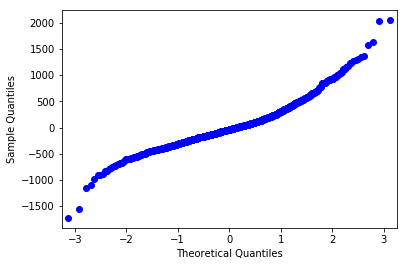

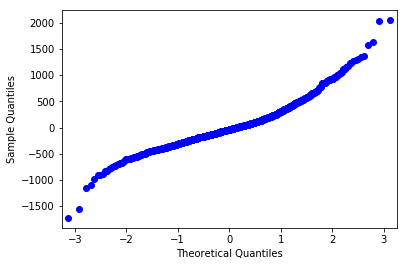

In [7]:
#Show residual data, the linear relationship indicates that the data is not skewed(normal)
predictions = test_model.predict(data_to_compare)
residuals = price_to_compare - predictions
sm.qqplot(residuals)